<a href="https://colab.research.google.com/github/fecaze/S-P-500-data-search/blob/main/S%26P500_2_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  8 of 8 completed


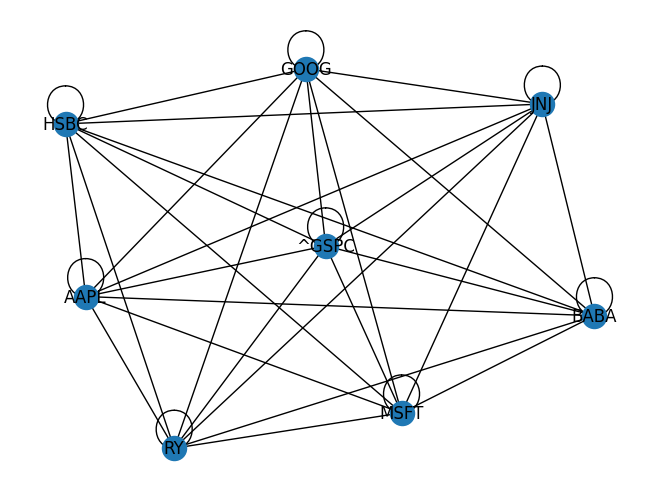

In [ ]:
import networkx as nx
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

# Definir as datas de início e fim
start_date = '2015-07-01'
end_date = '2020-06-28'

# Lista de ações no S&P500
tickers = ['AAPL', 'GOOG', 'MSFT', 'HSBC', 'JNJ', 'BABA', 'RY', '^GSPC'] # Adicione mais tickers conforme necessário

# Buscar os dados de fechamento ajustados para cada ação
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calcular os retornos diários
returns = data.pct_change()

# Criar o gráfico de rede
G = nx.from_pandas_adjacency(returns.corr())

# Desenhar o gráfico de rede
nx.draw(G, with_labels=True)
plt.show()

[*********************100%%**********************]  8 of 8 completed


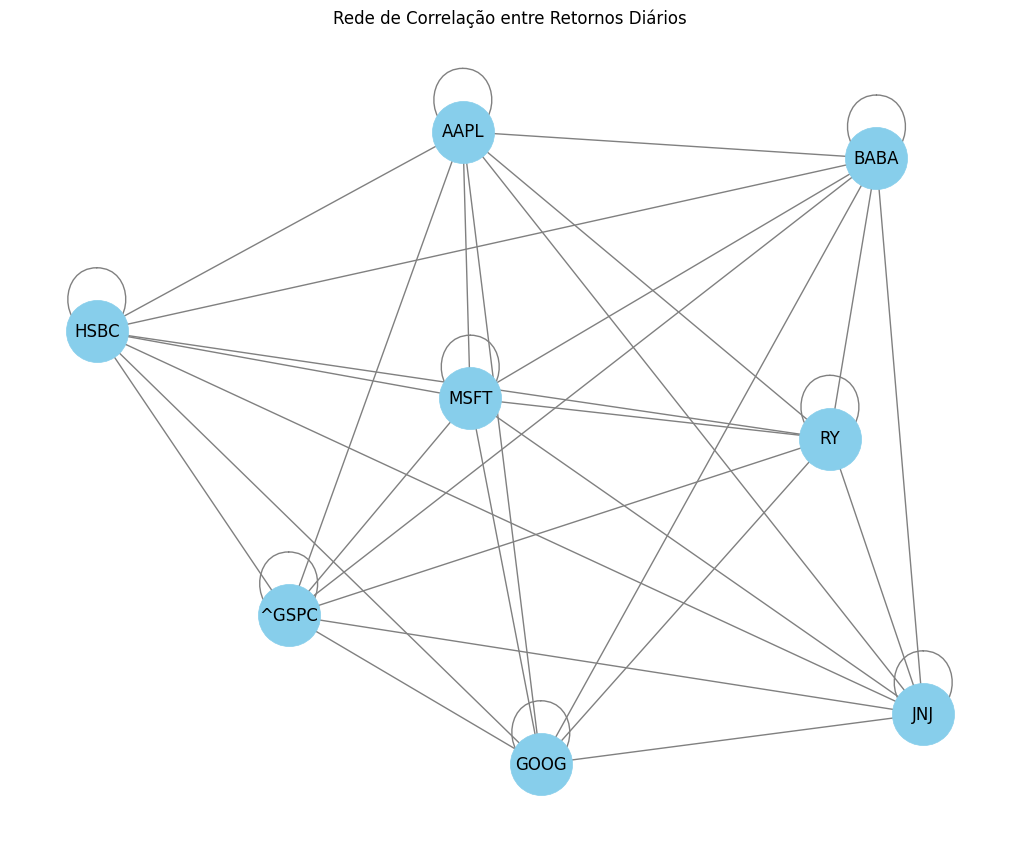


Dados Estatísticos Relevantes:
Média:
 Ticker
AAPL     0.001050
BABA     0.000977
GOOG     0.000911
HSBC    -0.000170
JNJ      0.000455
MSFT     0.001413
RY       0.000313
^GSPC    0.000370
dtype: float64
Mediana:
 Ticker
AAPL     0.000892
BABA     0.000736
GOOG     0.000913
HSBC     0.000000
JNJ      0.000447
MSFT     0.001259
RY       0.000644
^GSPC    0.000565
dtype: float64
Desvio Padrão:
 Ticker
AAPL     0.018271
BABA     0.020576
GOOG     0.017255
HSBC     0.014441
JNJ      0.012568
MSFT     0.017338
RY       0.014371
^GSPC    0.012203
dtype: float64

Correlação entre Retornos Diários:
Ticker      AAPL      BABA      GOOG      HSBC       JNJ      MSFT        RY  \
Ticker                                                                         
AAPL    1.000000  0.507727  0.645753  0.454762  0.455853  0.714666  0.514291   
BABA    0.507727  1.000000  0.529527  0.413824  0.287647  0.530779  0.390523   
GOOG    0.645753  0.529527  1.000000  0.435513  0.446670  0.751348  0.471603   


In [1]:
import networkx as nx
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

def download_data(tickers, start_date, end_date):
    try:
        data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
        return data
    except Exception as e:
        print("Erro ao baixar os dados:", e)
        return None

def calculate_returns(data):
    if data is not None:
        returns = data.pct_change()
        return returns
    else:
        return None

def visualize_network(returns):
    if returns is not None:
        # Criar o gráfico de rede
        G = nx.from_pandas_adjacency(returns.corr())

        # Personalizar o layout do gráfico
        pos = nx.spring_layout(G)

        # Desenhar o gráfico de rede
        plt.figure(figsize=(10, 8))
        nx.draw(G, pos=pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', linewidths=0.5)
        plt.title('Rede de Correlação entre Retornos Diários')
        plt.show()

        # Calcular dados estatísticos relevantes
        statistics = {
            'Média': returns.mean(),
            'Mediana': returns.median(),
            'Desvio Padrão': returns.std()
        }
        print("\nDados Estatísticos Relevantes:")
        for stat_name, stat_value in statistics.items():
            print(stat_name + ":\n", stat_value)

        # Calcular correlação entre os retornos diários
        correlation = returns.corr()
        print("\nCorrelação entre Retornos Diários:")
        print(correlation)
    else:
        print("Não foi possível visualizar a rede. Verifique se os dados estão disponíveis.")

def main():
    # Definir as datas de início e fim
    start_date = '2015-07-01'
    end_date = '2020-06-28'

    # Lista de ações no S&P500
    tickers = ['AAPL', 'GOOG', 'MSFT', 'HSBC', 'JNJ', 'BABA', 'RY', '^GSPC']

    # Baixar os dados
    data = download_data(tickers, start_date, end_date)

    # Calcular os retornos diários
    returns = calculate_returns(data)

    # Visualizar a rede de correlação e obter dados estatísticos relevantes
    visualize_network(returns)

if __name__ == "__main__":
    main()
